# EDA -Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Titanic Dataset 

In [6]:
df = pd.read_csv(r"C:\Users\user\Downloads\Dataset for Pandas.csv")
print(df)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

### Viewing the data

In [11]:
print(df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [13]:
print(df.tail())

     PassengerId  Pclass                          Name     Sex   Age  SibSp  \
413         1305       3            Spector, Mr. Woolf    male   NaN      0   
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0      0   
415         1307       3  Saether, Mr. Simon Sivertsen    male  38.5      0   
416         1308       3           Ware, Mr. Frederick    male   NaN      0   
417         1309       3      Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C  


### Info about the data

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [44]:
print(df["PassengerId"].isnull().sum()) # total null values in "PassengerId" column

0


### Checking total null values in each column

In [24]:
print(pd.isnull(df).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Cleaning Data
### Cleaning empty cells

In [42]:
df.dropna(inplace = True)

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


### Calculate the MEAN of age, and replace any empty values with it:

In [74]:
mean = df["Age"].mean()
df.fillna({"Age": mean}, inplace = True)

In [76]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 12 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Pclass       87 non-null     int64  
 2   Name         87 non-null     object 
 3   Sex          87 non-null     object 
 4   Age          87 non-null     float64
 5   SibSp        87 non-null     int64  
 6   Parch        87 non-null     int64  
 7   Ticket       87 non-null     object 
 8   Fare         87 non-null     float64
 9   Cabin        87 non-null     object 
 10  Embarked     87 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.2+ KB
None


In [70]:
# Checking null values
pd.isnull(df).sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Discovering Duplicates

In [81]:
df.duplicated("PassengerId").sum()

0

### Removing Duplicates

In [92]:
#df.drop_duplicated(subset = ['PassengerId'],inplace=True)

In [94]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,1.137931,39.247126,0.597701,0.482759,98.109198
std,126.751901,0.435954,15.218730,0.637214,0.860801,88.177319
min,904.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,986.000000,1.000000,27.000000,0.000000,0.000000,35.339600
50%,1094.000000,1.000000,39.000000,1.000000,0.000000,71.283300
75%,1216.000000,1.000000,50.000000,1.000000,1.000000,135.066650
max,1306.000000,3.000000,76.000000,3.000000,4.000000,512.329200


## Visualization

In [97]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


<BarContainer object of 1 artists>

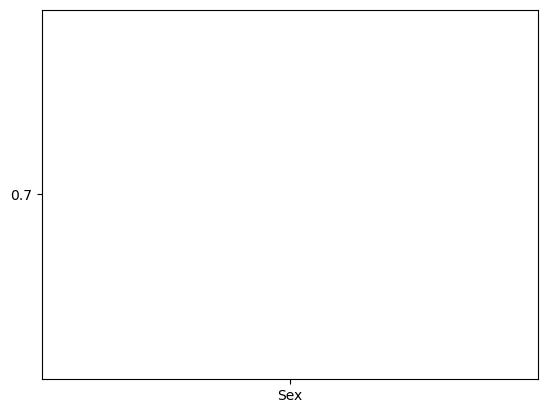